# 练习7 2021060904008-周杰锋

练习7：分别用交叉熵和误差平方和代价函数训练同一神经网络求解XOR问题比较误差-轮曲线

In [6]:
import numpy as np
import matplotlib.pyplot as plt


X_train = np.array([[0,0,1],[0,1,1], [1,0,1], [1,1,1]])

Y_train = np.array([[0],[1],[1],[0]])

SEED = 42


class NN:
    def __init__(self, in_hidden_out:list, if_bias=False, seed=None):
        self.input_size = in_hidden_out[0]
        self.output_size = in_hidden_out[-1]
        self.hidden_layers = len(in_hidden_out) - 2
        self.in_hidden_out = in_hidden_out
        self.if_bias = if_bias
        self.seed = seed
        self.weights = []
        self.biases = []
        self.loss = []
        self.activations = []


        self.initialize_weights_and_biases()

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)
    

    def corss_entropy(self, y_pred, y_true):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


    def initialize_weights_and_biases(self):
        if self.seed:
            np.random.seed(self.seed)
        for i in range(self.hidden_layers + 1):
            self.weights.append(np.random.rand(self.in_hidden_out[i], self.in_hidden_out[i+1]) * 2 -1)
            if self.if_bias:
                self.biases.append(np.random.rand((1, self.in_hidden_out[i+1]))*2 -1)
            else:
                self.biases.append(np.zeros((1, self.in_hidden_out[i+1])))

    def forward(self, X):
        self.activations = [X]
        for i in range(self.hidden_layers + 1):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            a = self.sigmoid(z)
            self.activations.append(a)
        return self.activations[-1]

    def backward(self, X, y, learning_rate, loss="cross_entropy"):
        _ = self.forward(X)   
        error = y - self.activations[-1]

        if loss=="cross_entropy":
            self.loss.append(self.corss_entropy(self.activations[-1], y))
        
        else:
            self.loss.append(np.mean(error ** 2))
        delta = error * self.sigmoid_derivative(self.activations[-1])
        self.weights[-1] += learning_rate * np.dot(self.activations[-2].T, delta)
        if self.if_bias:
            self.biases[-1] += learning_rate * np.sum(delta, axis=0, keepdims=True)

        for i in range(self.hidden_layers, 0, -1):
            delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(self.activations[i])
            self.weights[i-1] += learning_rate * np.dot(self.activations[i-1].T, delta)
            if self.if_bias:
                self.biases[i-1] += learning_rate * np.sum(delta, axis=0, keepdims=True)

    def train(self, X, y, epochs, learning_rate, loss="cross_entropy"):
        for _ in range(epochs):
            self.backward(X, y, learning_rate, loss)


    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()

[[0.35151934]
 [0.350779  ]
 [0.2994554 ]
 [0.30222388]]
[[0.01977956]
 [0.9671274 ]
 [0.97083262]
 [0.03572509]]


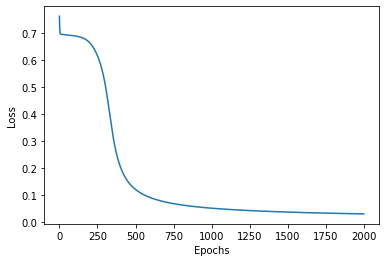

In [9]:
NN_model = NN([3,4,1], seed=SEED)
print(NN_model.forward(X_train))
NN_model.train(X_train, Y_train, epochs=2000, learning_rate=0.9, loss="cross_entropy")
print(NN_model.forward(X_train))
NN_model.plot_loss()

[[0.35151934]
 [0.350779  ]
 [0.2994554 ]
 [0.30222388]]
[[0.01977956]
 [0.9671274 ]
 [0.97083262]
 [0.03572509]]


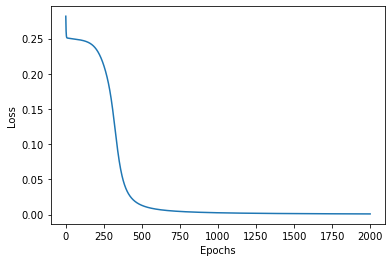

In [10]:
NN_model_MSE = NN([3,4,1],seed=SEED)
print(NN_model_MSE.forward(X_train))
NN_model_MSE.train(X_train, Y_train, epochs=2000, learning_rate=0.9, loss="MSE")
print(NN_model_MSE.forward(X_train))
NN_model_MSE.plot_loss()

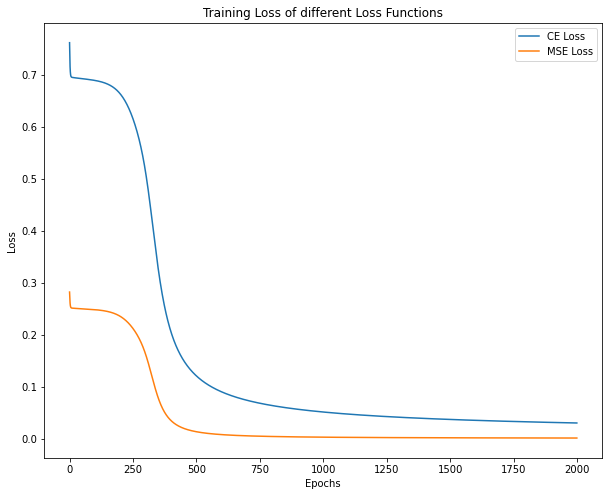

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(NN_model.loss, label='CE Loss')
plt.plot(NN_model_MSE.loss, label='MSE Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss of different Loss Functions')
plt.legend()
plt.show()

从结果可以看出，不同的LOSS function 对模型的训练效果有着不同的影响。
虽然从数值上看，CE比MSE的数值要高很多，但是其梯度下降的速度更快。
而MSE到达收敛所需训练epoch较少，而CE需要更多的epoch才能收敛。
现实中，CE的损失函数更适合处理分类问题，而MSE更适合处理回归问题。
